<a href="https://colab.research.google.com/github/Henry-Le-CS/Basic-Machine-Learning/blob/master/Assignment_1_Hand_Written_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem description

In this problem, I will use a simple neural network to recognition 0 and 1, written by hand.

This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)


# Packages

We use numpy, matplotlib, pandas, and tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

# Load and visualize data

In [8]:
X = np.load("X.npy")
y = np.load("y.npy")
X = X[0:1000]
y = y[0:1000]

In [9]:
print('The first element of X: ', X[0])

The first element of X:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00


In [10]:
print('The label of the first element: ',y[0])

The label of the first element:  [0]


Check for the dimension

In [11]:
print('The shape of X: ', X.shape)
print('The shape of Y: ', y.shape)

The shape of X:  (1000, 400)
The shape of Y:  (1000, 1)


We can see there are 1000 data. 

For each X, it has 400 features, which stands for a 20 x 20 pixel matrix.

Each picture is a row in our X matrix

Particularly, 
X = $
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)
$

So to extract X[0] or a sample i, we need to use $X^T$.

For each Y, it has 1 label of either 0 or 1

**Visualization**

The function plt.subplots return a tuple of figure and axes.

We will use imshow() to print the picture

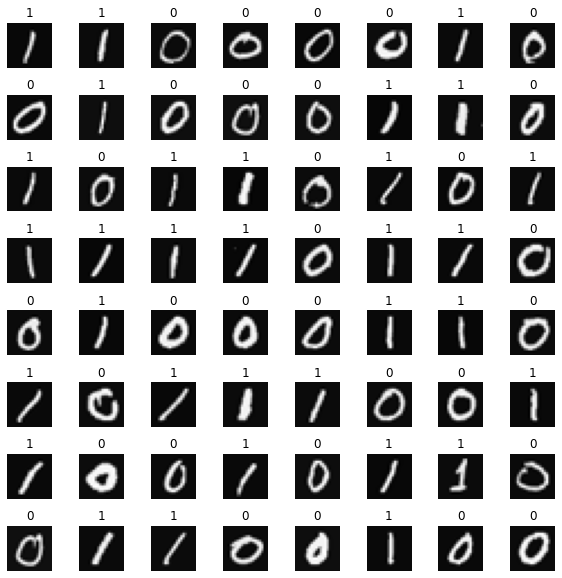

In [22]:
m,n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad = 0.1)

for i, ax in enumerate(axes.flat):
  random_index = np.random.randint(m)
  X_reshape = X[random_index].reshape(20,20).T
  ax.imshow(X_reshape,cmap = 'gray')
  ax.set_title(y[random_index,0])
  ax.set_axis_off()

# Model description

We will use a three layer with sigmoid activation functions as below:
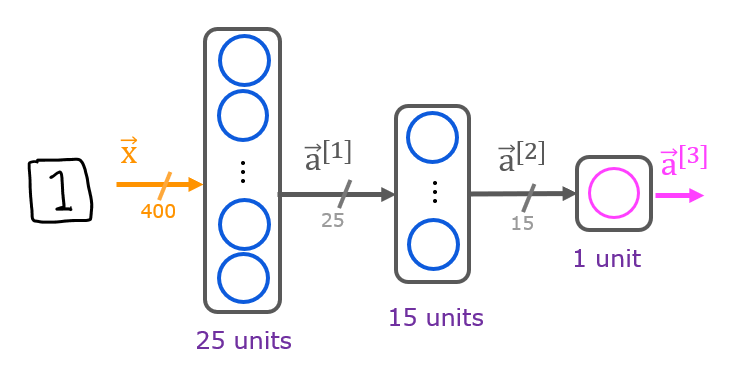

For the first hidden layer, it has 25 neurons with an input shape of 400.

The second hidden layer has 15 neurons with an input shape of 25

The output layer has 1 neuron with an input shape of 15

The dim of W is $S_{in} \text{x} S_{out}$,  b's is $S_{out}$ 

The parameter shape W of the first layer is (400, 25), b is (25,)

The parameter shape W of the first layer is (25, 15), b is (15,)

The parameter shape W of the first layer is (15, 1), b is (1,)

Let's define our model

In [24]:
model = keras.Sequential([
    keras.Input(shape = (400,)),
    keras.layers.Dense(units = 25, activation = 'sigmoid'),
    keras.layers.Dense(units = 15, activation = 'sigmoid'),
    keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

**Summarize our model**

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


Let's identify our model

In [27]:
[layer1, layer2, layer3] = model.layers

In [31]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer1.get_weights()
print('W\'s and b\'s dimension for layer 1: ', W1.shape,', ', b1.shape)
print('W\'s and b\'s dimension for layer 2: ', W2.shape,', ', b2.shape)
print('W\'s and b\'s dimension for layer 3: ', W3.shape,', ', b3.shape)

W's and b's dimension for layer 1:  (400, 25) ,  (25,)
W's and b's dimension for layer 2:  (25, 15) ,  (15,)
W's and b's dimension for layer 3:  (400, 25) ,  (25,)


The dimensions for W and b are as we expected

We will define the loss function and optimizer for our model next

In [32]:
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001)
)

Let's run our model

In [95]:
model.fit(X,y, epochs = 20,verbose=0)

Make some predictions...

In [96]:
X_0 = model.predict(X[0].reshape(1,400))
print('The probability of being 1 is: {}'.format(X_0))

1/1 [==============================] - 0s 19ms/step
The probability of being 1 is: [[0.00903661]]


Let's run through some examples and plot their image

1/1 [==============================] - 0s 23ms/step


Text(0.5, 0.98, 'Label-predicted')

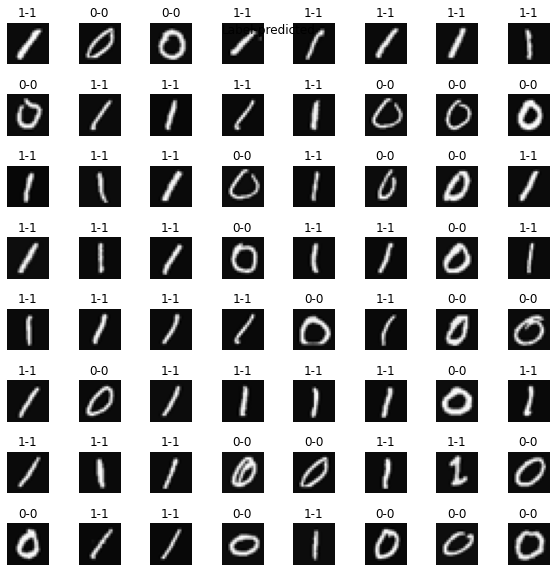

In [97]:
m,n = X.shape
fig, axes = plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.4)
for i, ax in enumerate(axes.flat):
  random_index = np.random.randint(m)
  X_reshape = X[random_index].reshape(20,20).T
  ax.imshow(X_reshape, cmap = 'gray')
  Yhat = model.predict(X[random_index].reshape(1,400))
  if Yhat > 0.5:
    Yhat = 1
  else:
    Yhat = 0
  ax.set_title(f"{y[random_index,0]}-{Yhat}")
  ax.set_axis_off()
fig.suptitle('Label-predicted')

# Hands-on model
We need to define our activation function, here, we use sigmoid function.

In [59]:
#Define our activation function
def sigmoid(x):
  return 1/(1+np.exp(-x))

Next, we need to define a dense layer

In [68]:
def dense(W, b, a_in, g):
  """
  n is the number of features of a
  m is the number of neurons in this layer
  W's dim is (nxm)
  b's dim is (m)
  a_in's dim is (dxn), d is the number of samples
  g is our activation function
  """
  a = np.matmul(a_in,W)+b
  return g(a)

In [69]:
#Example
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = dense( W_tst, b_tst, x_tst,sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


In [74]:
#To make it easy, we will reuse the weights from the model obtained from tf.keras
[layer1, layer2, layer3] = model.layers
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()

In [75]:
def Sequential(a_in, W1, b1, W2, b2, W3, b3, g):
  a1 = dense(W1, b1, a_in, g)
  a2 = dense(W2, b2, a1, g)
  a3 = dense(W3, b3, a2, g)
  return a3

In [77]:
#Quick test
print('The probability of being 1 of x[0]: ',Sequential(X[0],W1,b1,W2,b2,W3,b3,sigmoid))

The probability of being 1 of x[0]:  [0.02525962]


We got the same result as above.

Now, let's compare the results of the two methods

1/1 [==============================] - 0s 42ms/step


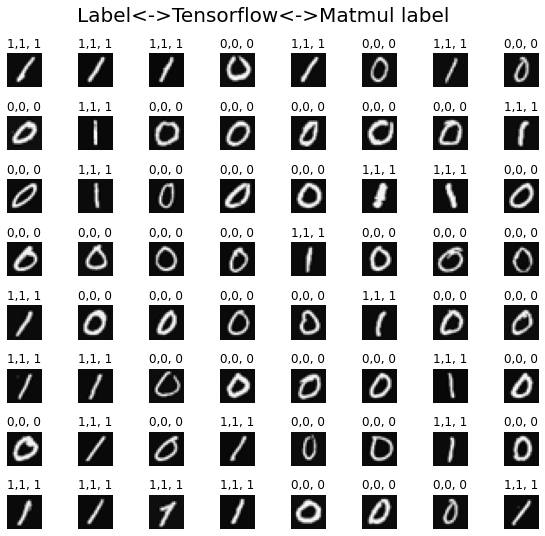

In [94]:

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.8,rect=[0, 0.03, 1, 0.92])

for i, ax in enumerate(axes.flat):
  random_index = np.random.randint(m)
  X_reshape = X[random_index].reshape(20,20).T

  ax.imshow(X_reshape, cmap = 'gray')

  Yhat1 = int(Sequential(X[random_index], W1, b1, W2, b2, W3, b3, sigmoid)>0.5)

  Yhat = int(model.predict(X[random_index].reshape(1,400))>0.5)

  ax.set_title(f"{y[random_index,0]},{Yhat}, {Yhat1}")
  ax.set_axis_off()
fig.suptitle('Label<->Tensorflow<->Matmul label',fontsize = 20)
plt.show()

# Conclusion

To sum up, the model uses 3 layers with sigmoid activation functions. Through this assignment, we are able to understand how a simple neural network is implemented.